In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.datasets import load_boston
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
np.random.seed(42)

/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
ames_df_test = pd.read_csv('../data/ames_iowa_data_test_data_clean', index_col='Id')
X_train_sc = pd.read_csv('../pickle/X_train_sc.csv', header=None)
X_test_sc = pd.read_csv('../pickle/X_test_sc.csv', header=None)
y_train = pd.read_csv('../data/y_train.csv', header=None)
y_test = pd.read_csv('../data/y_test.csv', header=None)
X_train = pd.read_csv('../data/X_train.csv', header=None)
X_test = pd.read_csv('../data/X_test.csv', header=None)

In [3]:
ames_df_test_object = ames_df_test.select_dtypes(exclude=['int64', 'float64'])
ames_df_numeric_test = ames_df_test.select_dtypes(exclude='object')
ames_df_object_dummies_test = pd.get_dummies(ames_df_test_object, drop_first=True)
ames_features_test = pd.concat([ames_df_numeric_test, ames_df_object_dummies_test], axis=1)

In [4]:
ames_df = pd.read_csv('../data/ames_iowa_data_clean', index_col='Id')
ames_df_objects = ames_df.select_dtypes(exclude=['int64', 'float64'])
ames_df_numeric = ames_df.select_dtypes(exclude='object')
ames_df_object_dummies = pd.get_dummies(ames_df_objects, drop_first=True)
ames_features = pd.concat([ames_df_numeric, ames_df_object_dummies], axis=1)
ames_features.drop('saleprice', axis=1, inplace=True)

#### Setup the Pipeline

In [5]:
pipe = Pipeline([
    ('var_thresh', VarianceThreshold()),
    ('ss', StandardScaler()),
    ('kbest', SelectKBest(f_regression)),
    ('ridge', Ridge())
])

#### GridSearch

In [6]:
params = {
    'var_thresh__threshold': [0, .05],
    'kbest__k': [30, 60],
    'ridge__alpha': np.logspace(-3, 3, 7)
}

In [7]:
gs = GridSearchCV(pipe, params)

In [8]:
X_train.shape

(1518, 213)

In [9]:
(X_train.var() < .05).sum()

122

In [10]:
gs.fit(X_train, y_train)

/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.0)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=10, score_func=<function f_regression at 0x10e39a488>)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'var_thresh__threshold': [0, 0.05], 'kbest__k': [30, 60], 'ridge__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
gs.score(X_train, y_train)

0.8584493407839375

In [12]:
gs.score(X_test, y_test)

0.8799013606392992

In [13]:
gs.best_params_

{'kbest__k': 60, 'ridge__alpha': 100.0, 'var_thresh__threshold': 0}

In [14]:
gs.best_estimator_.named_steps['var_thresh'].get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
gs.best_estimator_.named_steps['kbest'].get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,

In [16]:
gs.best_estimator_.named_steps['ridge'].coef_

array([[ -810.75107382,  4833.36745679, 16158.63642487,  1006.94300441,
         5852.58769444,  2821.07994215,  2235.69789883,  2629.94752331,
         2953.51378144,  6750.92453062,  8476.77625869,  4053.7020968 ,
         4018.9933948 ,  1649.93712868,  1970.62457095,  6281.76627774,
         5287.44135125,  3782.03995618,  1515.14968987,   115.08036553,
         -677.87281219, -2889.99590684,  -717.43902061,  3277.89383147,
         -669.32490071,  -307.84286029,  6269.39795427,  6944.87267829,
         -790.60041717,  5828.70184384, -4389.03436521,  -825.38144534,
         2065.09321487,  -563.50660446,  -248.949993  ,  2740.40484045,
          238.53215295,  1491.63034371,  1773.34063092, -4483.45586714,
        -6486.63430071,  -257.27823779,  2015.79739272, -5423.84300379,
        -1402.4766499 ,  4326.12348485, -2008.68582845,  1655.13003188,
        -2657.13122391,  2288.79689356,    40.28462207, -7763.27814648,
        -9252.52478709,  3324.79443588,   834.40756017,  1320.14

In [17]:
columns = ames_features.columns
columns = columns[gs.best_estimator_.named_steps['var_thresh'].get_support()]
columns = columns[gs.best_estimator_.named_steps['kbest'].get_support()]

pd.DataFrame(gs.best_estimator_.named_steps['ridge'].coef_, 
             columns = columns, index=['Coef Weights']).T


,Coef Weights
lot_frontage,-810.751074
lot_area,4833.367457
overall_qual,16158.636425
year_built,1006.943004
year_remod/add,5852.587694
mas_vnr_area,2821.079942
bsmtfin_sf_1,2235.697899
total_bsmt_sf,2629.947523
1st_flr_sf,2953.513781
2nd_flr_sf,6750.924531


In [18]:
pred_gs = gs.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, pred_gs)) ## RMSE

28202.6895064714

In [20]:
pred_gs.shape

(507, 1)

In [21]:
y_test.shape

(507, 1)

Text(0,0.5,'Actual Values')

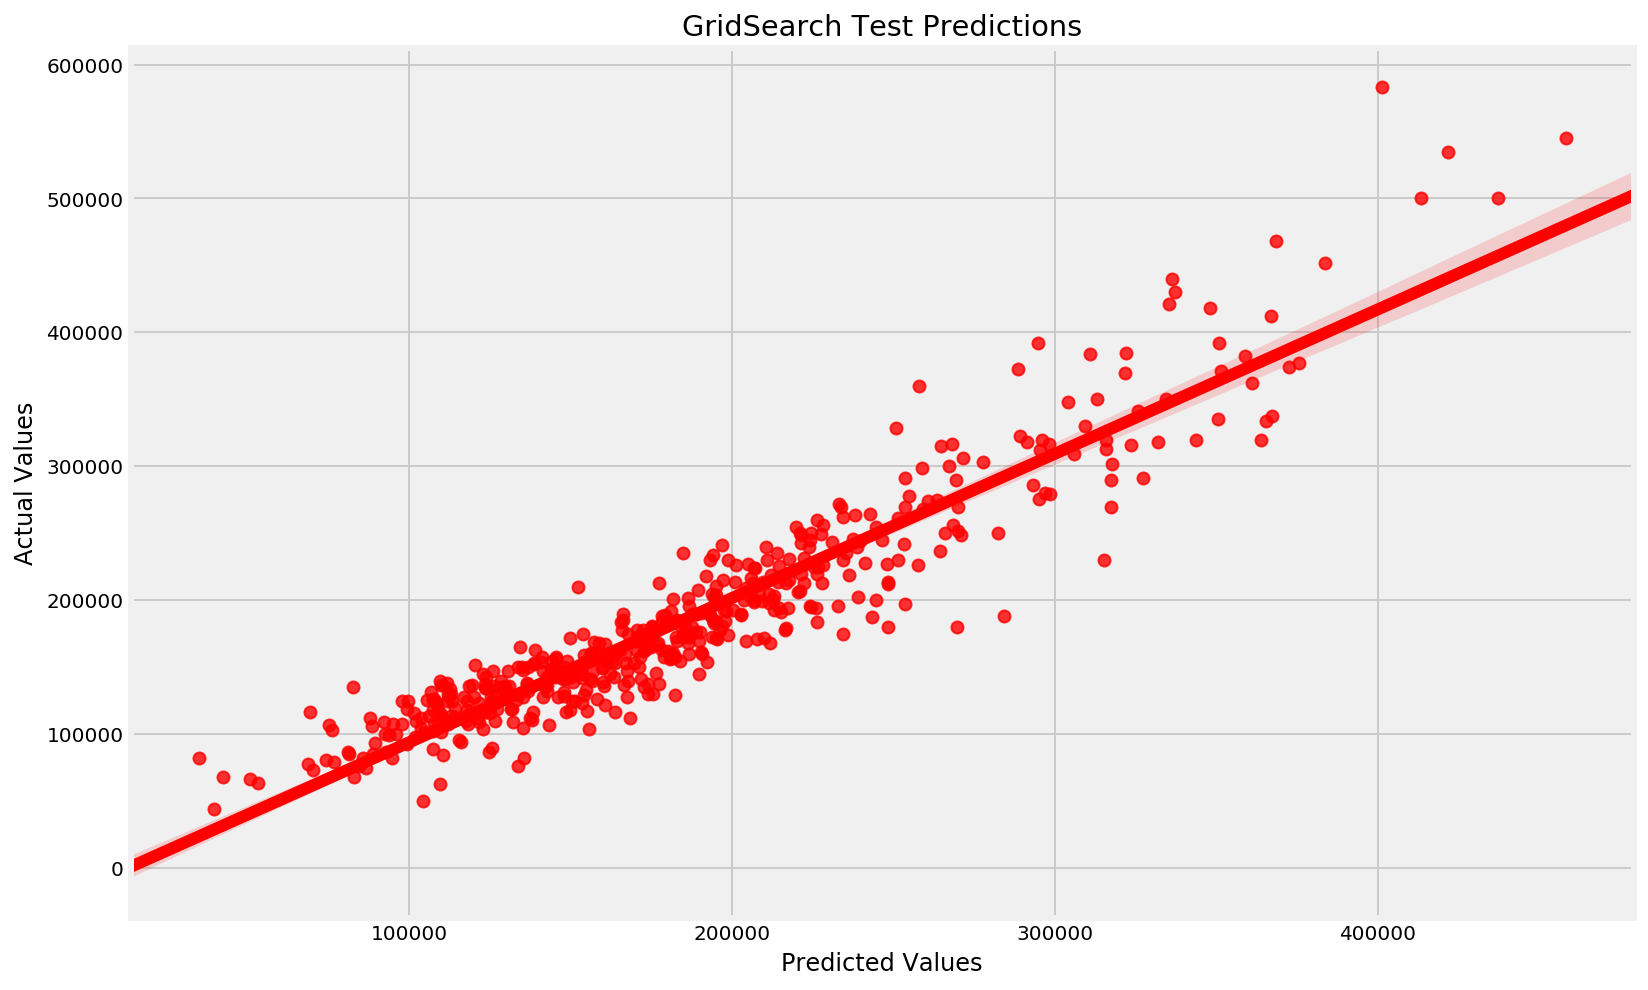

In [22]:
plt.figure(figsize=(12,8))
sns.regplot(pred_gs, y_test[0] , color='red')
plt.title("GridSearch Test Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

#### GridSearch KBest Predictions

In [23]:
diff_cols = set(ames_features.columns).difference(ames_features_test.columns)

In [24]:
for col in diff_cols:
    ames_features_test[col]=0

In [25]:
kaggle = ames_features_test[ames_features.columns]

In [26]:
pred_gs_final = gs.predict(kaggle)

In [27]:
final_gs_df = pd.DataFrame(pred_gs_final, index=kaggle.index, columns=['saleprice'])

In [28]:
final_gs_df.sort_index(inplace=True)

In [29]:
final_gs_df.to_csv('../data/gs_ridge_predictions2')